# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Analysis:
#### 1. From the data of latitude vs max temperature of a city we can see a correlation in that as a city approaches the equator or latitude of 0 degrees, the max temperature of that city increases.
#### 2. From the data looking at latitude vs humidity of a city, there is no real apparent correlation except maybe that in the latitude range of 20-40 degrees the humidity has a higher probability of being lower.
#### 3. From the data looking at latitude and either the percent of cloudiness or the wind speed for a city, there appears to be no obvious or clear correlation amongst the data.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
now=datetime.now()
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).
 

In [3]:
city_data_df = pd.DataFrame(cities)
city_data_df.rename(columns = {0:'City'}, inplace = True)
city_data_df['Cloudiness'] = ""
city_data_df['Country'] = ""
city_data_df['Date'] = ""
city_data_df['Humidity'] = ""
city_data_df['Lat'] = ""
city_data_df['Lng'] = ""
city_data_df['Max Temp'] = ""
city_data_df['Wind Speed'] = ""
city_data_df.set_index('City',inplace = True)
city_data_df.head()

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City,,,,,,,,
provideniya,,,,,,,,
kurilsk,,,,,,,,
mariinsk,,,,,,,,
punta arenas,,,,,,,,
castro,,,,,,,,


In [4]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

In [6]:
print('Beginning data retreival...')
print('---------------------------')
set_count = 1
record_count = 1

for counter,city in enumerate(cities):
    
    response = requests.get(query_url + city).json()
    
    if record_count == 51:
        set_count = set_count + 1
        record_count = 1
        
    print(f'Processing record {record_count} of set {set_count}: {city}')
    
    record_count = record_count + 1
    
    try:
        city_data_df.loc[city, 'Cloudiness'] = response['clouds']['all']
        city_data_df.loc[city, 'Country'] = response['sys']['country']
        city_data_df.loc[city, 'Date'] = response['dt']
        city_data_df.loc[city, 'Humidity'] = response['main']['humidity']
        city_data_df.loc[city, 'Lat'] = response['coord']['lat']
        city_data_df.loc[city, 'Lng'] = response['coord']['lon']
        city_data_df.loc[city, 'Max Temp'] = response['main']['temp_max']
        city_data_df.loc[city, 'Wind Speed'] = response['wind']['speed']
        
    except (KeyError):
        print(f"Problem with the data for city: {city}")
        
print('------------------------')
print('Data retreival complete.')
print('------------------------')

Beginning data retreival...
---------------------------
Processing record 1 of set 1: provideniya
Processing record 2 of set 1: kurilsk
Processing record 3 of set 1: mariinsk
Processing record 4 of set 1: punta arenas
Processing record 5 of set 1: castro
Processing record 6 of set 1: karratha
Processing record 7 of set 1: mataura
Processing record 8 of set 1: sentyabrskiy
Problem with the data for city: sentyabrskiy
Processing record 9 of set 1: forestville
Processing record 10 of set 1: atuona
Processing record 11 of set 1: bluff
Processing record 12 of set 1: la paz
Processing record 13 of set 1: ushuaia
Processing record 14 of set 1: vaini
Processing record 15 of set 1: kruisfontein
Processing record 16 of set 1: lodja
Processing record 17 of set 1: san cristobal
Processing record 18 of set 1: letlhakane
Processing record 19 of set 1: ponta do sol
Processing record 20 of set 1: tuktoyaktuk
Processing record 21 of set 1: mitsamiouli
Processing record 22 of set 1: touros
Processing re

Processing record 39 of set 4: yulara
Processing record 40 of set 4: pangai
Processing record 41 of set 4: iqaluit
Processing record 42 of set 4: maniitsoq
Processing record 43 of set 4: roma
Processing record 44 of set 4: bengkulu
Processing record 45 of set 4: karagaylinskiy
Processing record 46 of set 4: puerto ayora
Processing record 47 of set 4: huarmey
Processing record 48 of set 4: tiksi
Processing record 49 of set 4: sokolo
Processing record 50 of set 4: jinchang
Processing record 1 of set 5: ribeira grande
Processing record 2 of set 5: niquelandia
Processing record 3 of set 5: ulaangom
Processing record 4 of set 5: jumla
Processing record 5 of set 5: port-gentil
Processing record 6 of set 5: pignon
Processing record 7 of set 5: broome
Processing record 8 of set 5: ambulu
Processing record 9 of set 5: tabiauea
Problem with the data for city: tabiauea
Processing record 10 of set 5: sataua
Problem with the data for city: sataua
Processing record 11 of set 5: talnakh
Processing re

Processing record 24 of set 8: umm lajj
Processing record 25 of set 8: port-cartier
Processing record 26 of set 8: tuatapere
Processing record 27 of set 8: pecos
Processing record 28 of set 8: yumen
Processing record 29 of set 8: aykhal
Processing record 30 of set 8: samarai
Processing record 31 of set 8: mount isa
Processing record 32 of set 8: nyanguge
Processing record 33 of set 8: songjianghe
Processing record 34 of set 8: prestea
Processing record 35 of set 8: basco
Processing record 36 of set 8: janauba
Processing record 37 of set 8: espinal
Processing record 38 of set 8: muros
Processing record 39 of set 8: hun
Processing record 40 of set 8: saint george
Processing record 41 of set 8: mega
Processing record 42 of set 8: codrington
Processing record 43 of set 8: arak
Processing record 44 of set 8: sept-iles
Processing record 45 of set 8: alta floresta
Processing record 46 of set 8: tromso
Processing record 47 of set 8: halifax
Processing record 48 of set 8: haibowan
Problem with 

Processing record 10 of set 12: mastung
Processing record 11 of set 12: vestmannaeyjar
Processing record 12 of set 12: faya
Processing record 13 of set 12: choma
Processing record 14 of set 12: tahta
Processing record 15 of set 12: waingapu
Processing record 16 of set 12: itapaci
Processing record 17 of set 12: catuday
Processing record 18 of set 12: vila franca do campo
Processing record 19 of set 12: soyo
Processing record 20 of set 12: hirtshals
Processing record 21 of set 12: nortelandia
Processing record 22 of set 12: micheweni
Processing record 23 of set 12: port lincoln
Processing record 24 of set 12: omboue
Processing record 25 of set 12: chagda
Problem with the data for city: chagda
Processing record 26 of set 12: tessalit
Processing record 27 of set 12: ituni
Problem with the data for city: ituni
Processing record 28 of set 12: paradwip
Problem with the data for city: paradwip
Processing record 29 of set 12: andalan
Processing record 30 of set 12: stornoway
Processing record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_data_df.drop(city_data_df[city_data_df['Date'] == ''].index, inplace = True)
city_data_df.reset_index(inplace=True)
city_data_df.index.names = ["City_ID"]
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,provideniya,90,RU,1596061967,87,64.38,-173.3,50,8.95
1,kurilsk,46,RU,1596062097,81,45.23,147.88,61.52,6.76
2,mariinsk,82,RU,1596062097,94,56.21,87.75,56.1,3.91
3,punta arenas,99,CL,1596061931,80,-53.15,-70.92,39.2,13.87
4,castro,100,BR,1596062097,97,-24.79,-50.01,53.74,7.7


In [8]:
city_data_df.to_csv ('..\output_data\cities.csv', index = True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
len(city_data_df)

542

In [10]:
city_data_df.drop(city_data_df[city_data_df['Humidity'] > 100].index, inplace = True)
len(city_data_df)

542

In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [13]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [23]:
def latitude_vs_plot(x_values, y_values, ylabel):
    plt.scatter(x_values, y_values, alpha = .5, edgecolors='b')
    plt.grid(linestyle='-', linewidth='0.5', color='grey')
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(f'City Latitude vs. {ylabel} ({now.strftime("%x")})')
    plt.savefig(f"..\output_data\City_Lat_vs_{ylabel.replace(' ','')}.png")
    plt.show()

## Latitude vs. Temperature Plot

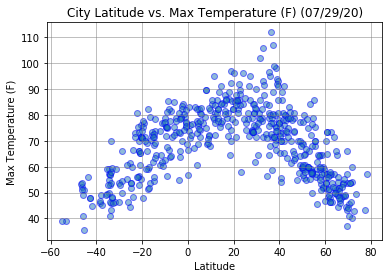

In [24]:
latitude_vs_plot(city_data_df['Lat'], city_data_df['Max Temp'], 'Max Temperature (F)')

#### Analysis: From the datat of latitude and max temperature of a city we can see a correlation in that as a city approaches the equator or latitude of 0 degrees, the max temperature of that city increases.

## Latitude vs. Humidity Plot

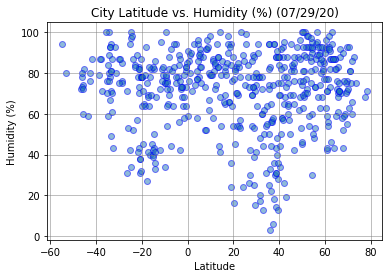

In [25]:
latitude_vs_plot(city_data_df['Lat'], city_data_df['Humidity'], 'Humidity (%)')

#### Analysis: There is no clear correlation amongst the data shown except maybe that around latitude of 20-40 degrees the humidity has a higher probability of being lower.

## Latitude vs. Cloudiness Plot

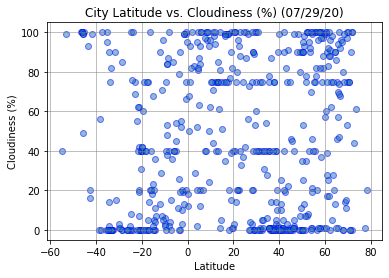

In [26]:
latitude_vs_plot(city_data_df['Lat'], city_data_df['Cloudiness'], 'Cloudiness (%)')

#### Analysis: No obvious or clear correlation amongst this data.

## Latitude vs. Wind Speed Plot

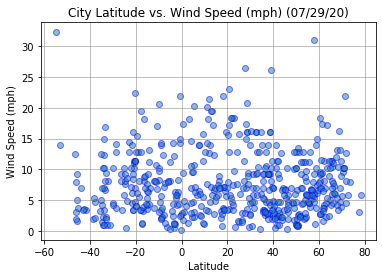

In [27]:
latitude_vs_plot(city_data_df['Lat'], city_data_df['Wind Speed'], 'Wind Speed (mph)')

#### Analysis: No obvious or clear correlation amongst this data.

## Linear Regression

In [28]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_data_df[city_data_df['Lat']>=0]
southern_df = city_data_df[city_data_df['Lat']<0]

In [29]:
northern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,provideniya,90,RU,1596061967,87,64.38,-173.3,50,8.95
1,kurilsk,46,RU,1596062097,81,45.23,147.88,61.52,6.76
2,mariinsk,82,RU,1596062097,94,56.21,87.75,56.1,3.91
7,forestville,1,US,1596062098,40,38.85,-76.88,93.99,9.17
15,san cristobal,40,VE,1596062100,52,7.77,-72.22,89.6,13.87


In [30]:
northern_df = northern_df[['Cloudiness','Humidity','Lat','Lng','Max Temp','Wind Speed']].astype(float)
northern_df.dtypes

Cloudiness    float64
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [31]:
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
3,punta arenas,99,CL,1596061931,80,-53.15,-70.92,39.2,13.87
4,castro,100,BR,1596062097,97,-24.79,-50.01,53.74,7.7
5,karratha,0,AU,1596062097,38,-20.74,116.85,65.35,11.32
6,mataura,100,NZ,1596062098,78,-46.19,168.86,52.03,3.04
8,atuona,6,PF,1596062098,75,-9.8,-139.03,78.98,20.54


In [32]:
southern_df = southern_df[['Cloudiness','Humidity','Lat','Lng','Max Temp','Wind Speed']].astype(float)
southern_df.dtypes

Cloudiness    float64
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [80]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, ylabel, hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, alpha = .5, edgecolors='b')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")
    plt.grid(linestyle='-', linewidth='0.5', color='grey')
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(f'{hemisphere} Hemisphere - {ylabel} vs. Latitude Linear Regression ({now.strftime("%x")})')    
    plt.savefig(f"../output_data/{hemisphere}_Lat_vs_{ylabel.replace(' ','')}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

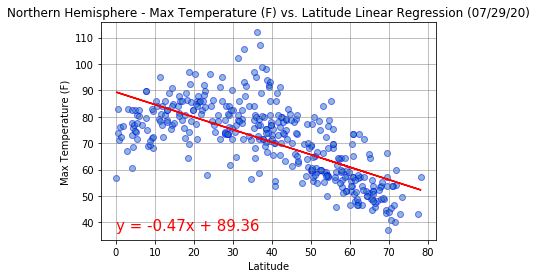

In [81]:
linear_regression_plot(northern_df['Lat'],northern_df['Max Temp'],'Max Temperature (F)','Northern')

#### Analysis: As a city moves further north from the equator the max temperature drops.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

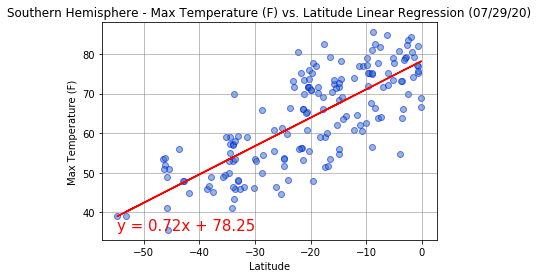

In [82]:
linear_regression_plot(southern_df['Lat'],southern_df['Max Temp'],'Max Temperature (F)','Southern')

#### Analysis: As a city moves further south away from the equator the max temperature drops.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

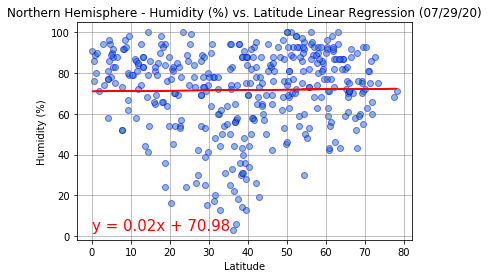

In [83]:
linear_regression_plot(northern_df['Lat'],northern_df['Humidity'],'Humidity (%)','Northern')

#### Analysis: No clear correlation seen here except maybe again that a city would have a higher probability of less humidity in the 20-40 degrees range.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

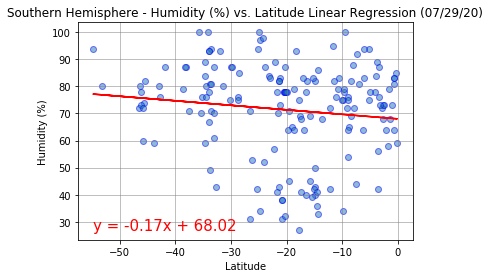

In [84]:
linear_regression_plot(southern_df['Lat'],southern_df['Humidity'],'Humidity (%)','Southern')

#### Analysis: No obvious or clear correlation amongst this data.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

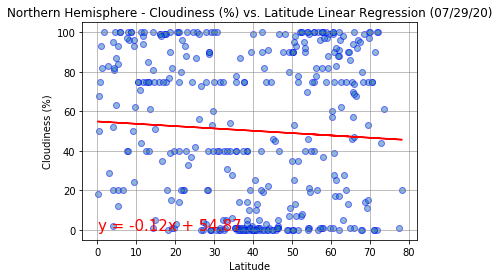

In [85]:
linear_regression_plot(northern_df['Lat'],northern_df['Cloudiness'],'Cloudiness (%)','Northern')

#### Analysis: No obvious or clear correlation amongst this data.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

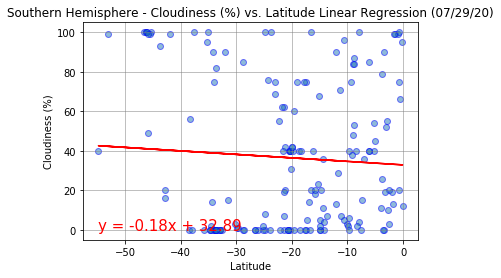

In [86]:
linear_regression_plot(southern_df['Lat'],southern_df['Cloudiness'],'Cloudiness (%)','Southern')

#### Analysis: No obvious or clear correlation amongst this data.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

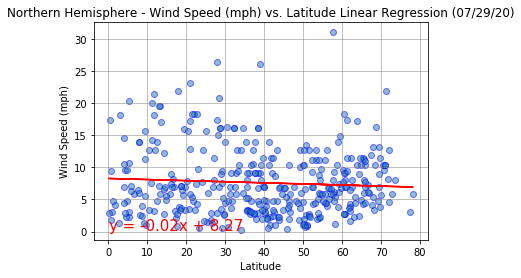

In [87]:
linear_regression_plot(northern_df['Lat'],northern_df['Wind Speed'],'Wind Speed (mph)','Northern')

#### Analysis: No obvious or clear correlation amongst this data.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

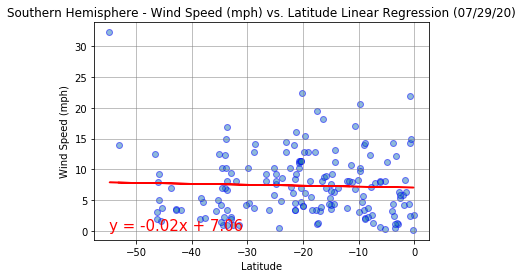

In [88]:
linear_regression_plot(southern_df['Lat'],southern_df['Wind Speed'],'Wind Speed (mph)','Southern')

#### Analysis: No obvious or clear correlation amongst this data.